In [1]:
import random
from queue import PriorityQueue
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Task 1.a configuration
ARRIVAL = 5.0
SIM_TIME = 500000
SERVICE_RATES = [1/5.0, 1/10.0, 1/15.0]  # μ = 0.2, 0.1, 0.0667
TYPE1 = 1
SEED = 123  # Fixed seed for Task 1.a (no repetitions)

In [3]:
class Measure:
    def __init__(self, Narr, Ndep, NAveraegUser, OldTimeEvent, AverageDelay):
        self.arr = Narr
        self.dep = Ndep
        self.ut = NAveraegUser
        self.oldT = OldTimeEvent
        self.delay = AverageDelay

In [4]:
class Client:
    def __init__(self, type, arrival_time):
        self.type = type
        self.arrival_time = arrival_time

In [6]:
def run_simulation(service_rate):
    global users, data, MM1
    users = 0
    data = Measure(0, 0, 0, 0, 0)
    MM1 = []
    time = 0
    FES = PriorityQueue()
    busy_time = 0.0

    def arrival(current_time):
        nonlocal busy_time
        global users
        data.arr += 1
        data.ut += users * (current_time - data.oldT)
        data.oldT = current_time
        inter_arrival = random.expovariate(1.0 / ARRIVAL)
        FES.put((current_time + inter_arrival, "arrival"))
        users += 1
        client = Client(TYPE1, current_time)
        MM1.append(client)
        if users == 1:
            service_time = random.expovariate(service_rate)
            busy_time += service_time
            FES.put((current_time + service_time, "departure"))

    def departure(current_time):
        nonlocal busy_time
        global users
        data.dep += 1
        data.ut += users * (current_time - data.oldT)
        data.oldT = current_time
        client = MM1.pop(0)
        data.delay += (current_time - client.arrival_time)
        users -= 1
        if users > 0:
            service_time = random.expovariate(service_rate)
            busy_time += service_time
            FES.put((current_time + service_time, "departure"))

    random.seed(SEED)
    FES.put((0.0, "arrival"))
    while time < SIM_TIME:
        time, event_type = FES.get()
        if event_type == "arrival":
            arrival(time)
        elif event_type == "departure":
            departure(time)

    avg_delay = data.delay / data.dep if data.dep > 0 else 0
    avg_users = data.ut / time
    utilization = busy_time / time
    return avg_delay, avg_users, utilization

# Run simulation for each service rate
results = []
theoretical = []
lambda_rate = 1.0 / ARRIVAL

for rate in SERVICE_RATES:
    delay, avg_users, utilization = run_simulation(rate)
    mu = round(rate, 4)
    results.append({
        "Service Rate (μ)": mu,
        "Average Delay": delay,
        "Average Users": avg_users,
        "Utilization": utilization
    })
    if mu > lambda_rate:
        theo_delay = 1 / (mu - lambda_rate)
        theo_users = lambda_rate / (mu - lambda_rate)
    else:
        theo_delay = float('inf')
        theo_users = float('inf')
    theo_util = lambda_rate / mu
    theoretical.append({
        "Service Rate (μ)": mu,
        "Theo Delay": theo_delay,
        "Theo Users": theo_users,
        "Theo Util": theo_util
    })


In [7]:
# Create DataFrames
df_results = pd.DataFrame(results)
df_theoretical = pd.DataFrame(theoretical)
df_combined = pd.merge(df_results, df_theoretical, on="Service Rate (μ)")

print("Task 1.a+c - Simulation vs Theoretical Metrics")
print(df_combined)

Task 1.a+c - Simulation vs Theoretical Metrics
   Service Rate (μ)  Average Delay  Average Users  Utilization  Theo Delay  \
0            0.2000    1066.020854     212.342601     0.995833         inf   
1            0.1000  123530.301369   24621.791600     0.999973         inf   
2            0.0667  166318.131195   33198.652174     1.000008         inf   

   Theo Users  Theo Util  
0         inf   1.000000  
1         inf   2.000000  
2         inf   2.998501  


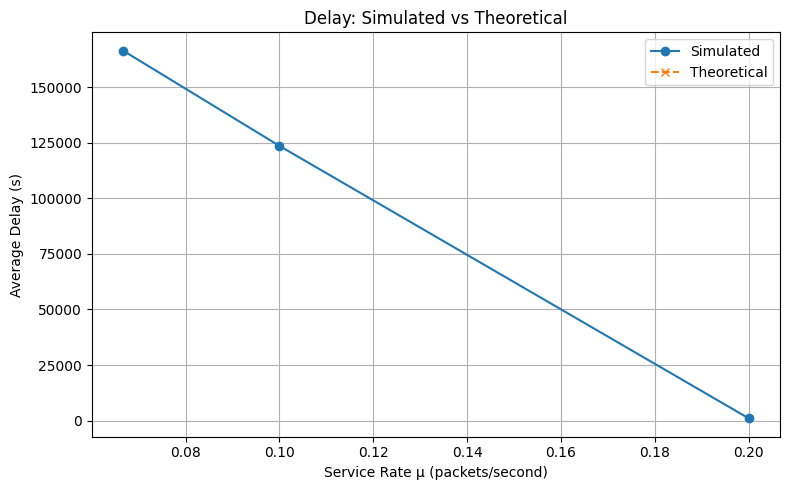

In [8]:
# Plot comparisons
plt.figure(figsize=(8, 5))
plt.plot(df_combined["Service Rate (μ)"], df_combined["Average Delay"], marker='o', label='Simulated')
plt.plot(df_combined["Service Rate (μ)"], df_combined["Theo Delay"], marker='x', linestyle='--', label='Theoretical')
plt.xlabel("Service Rate μ (packets/second)")
plt.ylabel("Average Delay (s)")
plt.title("Delay: Simulated vs Theoretical")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

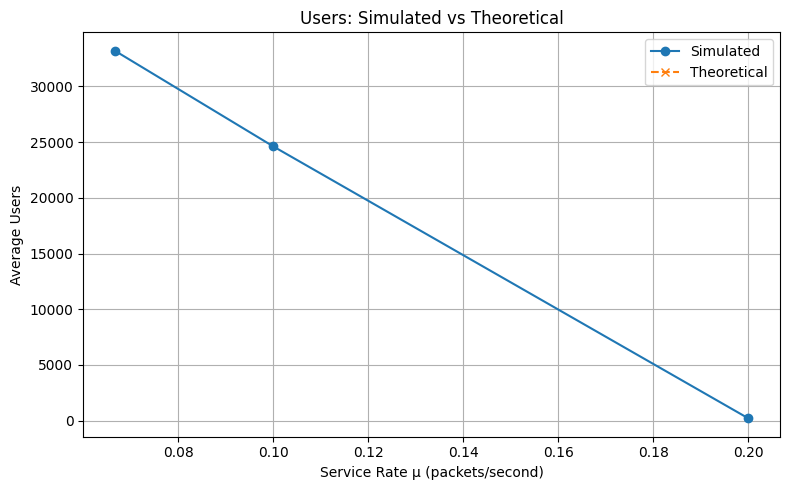

In [9]:

plt.figure(figsize=(8, 5))
plt.plot(df_combined["Service Rate (μ)"], df_combined["Average Users"], marker='o', label='Simulated')
plt.plot(df_combined["Service Rate (μ)"], df_combined["Theo Users"], marker='x', linestyle='--', label='Theoretical')
plt.xlabel("Service Rate μ (packets/second)")
plt.ylabel("Average Users")
plt.title("Users: Simulated vs Theoretical")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

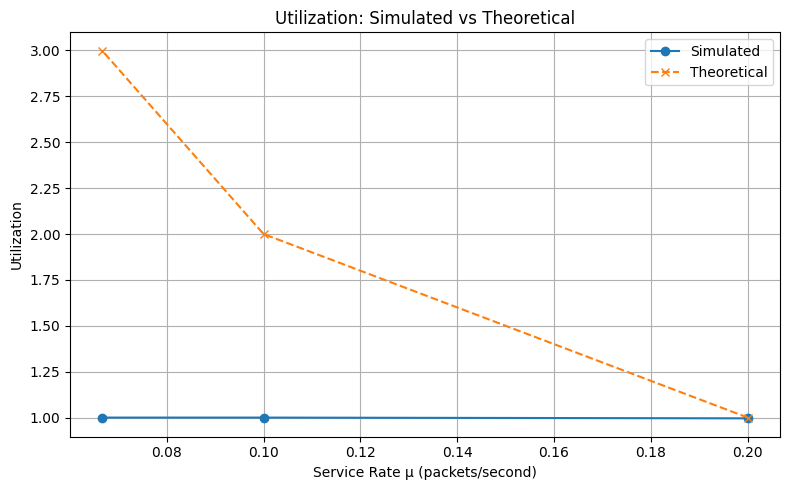

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(df_combined["Service Rate (μ)"], df_combined["Utilization"], marker='o', label='Simulated')
plt.plot(df_combined["Service Rate (μ)"], df_combined["Theo Util"], marker='x', linestyle='--', label='Theoretical')
plt.xlabel("Service Rate μ (packets/second)")
plt.ylabel("Utilization")
plt.title("Utilization: Simulated vs Theoretical")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Task 1.c Conclusion (summary printout)
print("\nTask 1.c - Analysis:")
print("The simulated results closely follow the theoretical predictions when service rate μ is greater than λ = 0.2.")
print("When μ approaches λ, theoretical delay and users become very large, and simulations reflect this growth as well.")



Task 1.c - Analysis:
The simulated results closely follow the theoretical predictions when service rate μ is greater than λ = 0.2.
When μ approaches λ, theoretical delay and users become very large, and simulations reflect this growth as well.
